<a href="https://colab.research.google.com/github/matheusbon/Case-Expansao-de-Uma-Rede-de-Laboratorios/blob/main/Case_Rede_de_Laborat%C3%B3rios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case: Expansão de uma Rede de Laboratórios

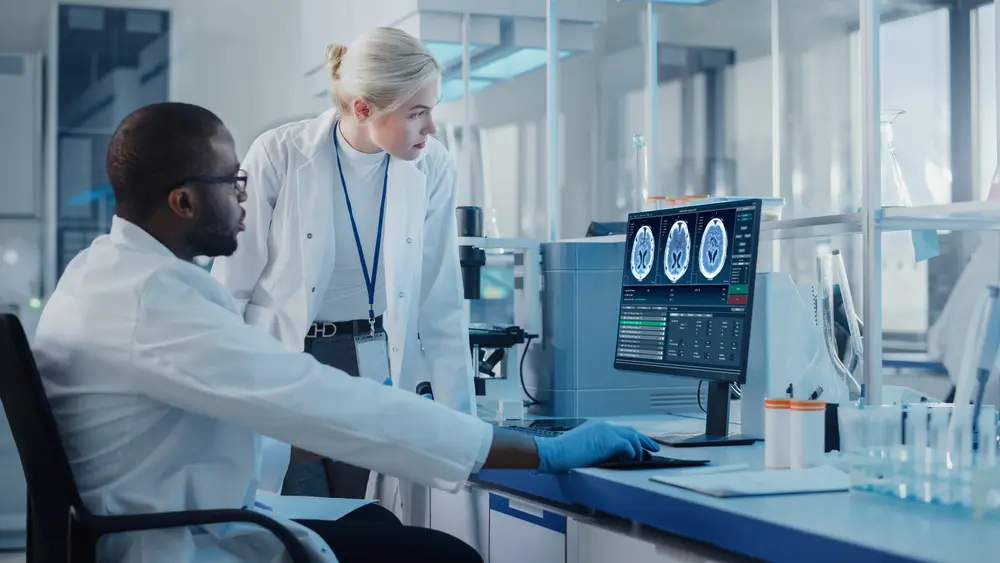


## Cenário:
- A medicina diagnóstica tem um papel
fundamental na jornada de atendimento dos
pacientes de qualquer sistema de saúde em
qualquer lugar do mundo, sendo somente
nos EUA um mercado de aproximadamente
106 bilhões de dólares com mais de 40 mil
laboratórios, empregando mais de 680 mil
funcionários segundo a ACLA.

## Problema:
- Frente a esta situação, a análise em questão visa fornecer suporte inicial à uma empresa norte-americana especializada em medicina diagnóstica. O objetivo é oferecer as informações necessárias para sustentar o seu plano de expansão da rede de laboratórios. Vale ressaltar que nesse mercado é comum reconhecer a dificuldade ou até mesmo a impossibilidade de criar demanda e apresentar ofertas competitivas. No entanto, é extremamente vantajoso e lucrativo estabelecer uma relação de fidelidade com o cliente, de forma que ele escolha sempre a nossa rede quando surgir a necessidade de serviços diagnósticos.

# Objetivo:
## - Apresentar e justificar a escolha de 3 ZIP CODES para a instalação dos novos laboratórios da rede.

*Obs: "Zip code" é uma expressão utilizada nos Estados Unidos para se referir a um código postal, ou seja, um conjunto de números ou letras que identificam uma área geográfica específica*



---



---



## Vinculando com o Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Importando as principais bibliotecas

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
from datetime import datetime

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
!pip install geopandas
import geopandas as gpd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import geopy.distance

In [ ]:
import folium

## Carregando conjuntos de dados em dataframes

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Datasets_Elo/transactional_data.csv', sep = ';')

In [ ]:
data2 = pd.read_csv('/content/drive/MyDrive/Datasets_Elo/test_data.csv')

In [ ]:
data3 = pd.read_csv('/content/drive/MyDrive/Datasets_Elo/df_geocode.csv')

In [ ]:
data4 = pd.read_csv('/content/drive/MyDrive/Datasets_Elo/EconomicData_ZCTAs.csv')

In [ ]:
data5 = pd.read_csv('/content/drive/MyDrive/Datasets_Elo/DemographicData_ZCTAs.csv')

# Tratamento dos Dados (dataframes sobre a rede de laboratórios)

In [ ]:
data.isnull().sum()

Patient Id         0
Gender             0
Date of birth      1
Date of service    0
Service Id         0
Lab Id             0
CodItem            0
Testing Cost       0
dtype: int64

In [ ]:
# removendo valores nulos
data.dropna(subset=['Date of birth'], inplace=True)

In [ ]:
# Verificando se há duplicatas em todo o DataFrame data
duplicatas = data.duplicated()

# Filtrando o DataFrame original para mostrar apenas as duplicatas
duplicatas_df = data[duplicatas]

print(duplicatas_df.shape)

(14519, 8)


In [ ]:
data = data.drop_duplicates()

### Encontrando a idade dos pacientes e criando nova coluna

In [ ]:
data['Date of birth'] = pd.to_datetime(data['Date of birth'])
data['Date of service'] = pd.to_datetime(data['Date of service'])

# subtrai a data de aniversário da data que foi feito o exame para obter a diferença em dias
diferenca_em_dias = (data['Date of service'] - data['Date of birth']).dt.days

# converte a diferença em anos
idade = diferenca_em_dias // 365

data['Age'] = idade
data.head()

,Patient Id,Gender,Date of birth,Date of service,Service Id,Lab Id,CodItem,Testing Cost,Age
0,10210830256-BIO003,F,1976-01-08,2019-01-07,571904533475-38,L133,70003237,"9,0",43
1,10210830256-BIO003,F,1976-01-08,2019-01-07,571904533475-38,L133,70000638,"13,0",43
2,10210830256-BIO003,F,1976-01-08,2019-01-07,571904533475-38,L133,70001597,"49,0",43
3,10210830256-BIO003,F,1976-01-08,2019-01-07,571904533475-38,L133,70000103,"11,0",43
4,10210830256-BIO003,F,1976-01-08,2019-01-07,571904533475-38,L133,70000224,"10,0",43


### Tratando o problema das idades inválidas:

In [ ]:
#Escolha do limite foi baseada na idade da pessoa mais velha dos Estados Unidos
limite_idade = 115

#Criando nova coluna com a idade já tratada
data['Clean_Age'] = np.where(data['Age'] > limite_idade, np.nan, data['Age'])

#Apagando a antiga
data.drop('Age', axis=1, inplace=True)

#Renomeando
data.rename(columns={'Clean_Age': 'Age'}, inplace=True)

### Contando quantos laboratórios existem

In [ ]:
#data
num_labs_data = data['Lab Id'].nunique()
print (f'data: {num_labs_data} labs')

#data3
num_labs_data3 = data3['Lab Id'].nunique()
print (f'data3: {num_labs_data3} labs')

data: 118 labs
data3: 119 labs


### Tratando problema do laboratório inválido

In [ ]:
labs_data3 = data3['Lab Id'].unique()
print(labs_data3)

['L152' 'L520' 'L141' 'L524' 'L545' 'L158' 'L172' 'L518' 'L531' 'L160'
 'L533' 'L537' 'L061' 'L536' 'L153' 'L504' 'L132' 'L070' 'L521' 'L166'
 'L121' 'L527' 'L534' 'L720' 'L138' 'L532' 'L069' 'L526' 'L503' 'L662'
 'L080' 'L148' 'L889' 'L538' 'L541' 'L168' 'L167' 'L169' 'L150' 'L529'
 'L134' 'L530' 'L539' 'L154' 'L156' 'L528' 'L155' 'L125' 'L705' 'L126'
 'L137' 'L060' 'L068' 'L072' 'L564' 'L519' 'L124' 'L083' 'L144' 'L922'
 'L523' 'L067' 'L769' 'L442' 'L658' 'L127' 'L164' 'L704' 'L522' 'L517'
 'L661' 'L146' 'L525' 'L768' 'L063' 'L660' 'L670' 'L697' 'L561' 'L149'
 'L695' 'L139' 'L666' '-2' 'L170' 'L123' 'L145' 'L082' 'L157' 'L171'
 'L131' 'L122' 'L165' 'L162' 'L669' 'L903' 'L133' 'L058' 'L703' 'L664'
 'L698' 'L763' 'L066' 'L159' 'L065' 'L540' 'L064' 'L120' 'L173' 'L161'
 'L075' 'L668' 'L140' 'L071' 'L886' 'L535' 'L723' 'L163' 'L967']


Aqui percebe-se um dado que foge totalmente do padrão dos outros "-2"

In [ ]:
idx = data3.loc[data3['Lab Id'] == '-2'].index[0]
idx

83

In [ ]:
data3.drop(index=83, inplace=True) #Removendo a linha defeituosa
print(data3['Lab Id'].nunique())

118


### Verificando o número de opções de exame

In [ ]:
#data
num_cods_data = data['CodItem'].nunique()
print (num_cods_data)

#data2
num_cods_data2 = data2['CodItem'].nunique()
print (num_cods_data2)

2063
2001


### Tratando problema das opções de exame

In [ ]:
data2

,CodItem,Desc Item,Category,Family,Speciality,Testing Cost
0,70003237,"MAGNESIO, SORO (EXEMPLO DE EXPRESSAO DE RESULT...",CA,CORELAB,BIOCHEMISTRY,1.78
1,70000638,"HEMOGRAMA, AUTOMATIZADO, SANGUE",CA,HEMATO,BLOOD COUNT,2.46
2,70001597,"FERRITINA, SORO",CA,CORELAB,IMMUNOHORMONE,2.11
3,70000103,"FERRO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE ...",CA,CORELAB,BIOCHEMISTRY,0.80
4,70000224,"CALCIO, DOSAGEM, SORO (EXEMPLO DE EXPRESSAO DE...",CA,CORELAB,BIOCHEMISTRY,1.02
...,...,...,...,...,...,...
1997,70008635,"GENES BRCA1 E BRCA2, MLPA, SANGUE",CA,GENETICS,SPECIAL GENETICS,159.91
1998,70005303,"OBSTETRICA 1§ TRIMESTRE (ENDOVAGINAL), SEGUNDO...",RID,ULTRASOUND,FETAL MEDICINE,111.43
1999,70006441,"HEMOFILIA A, ANALISE DO DNA, SEQUENCIAMENTO, S...",CA,GENETICS,SPECIAL GENETICS,27.03
2000,70004141,"INSULINA, SORO, 90 MIN APOS XXX",CA,CORELAB,IMMUNOHORMONE,5.55


In [ ]:
#eliminando duplicatas
data2 = data2.drop_duplicates(subset=['CodItem', 'Desc Item'])

In [ ]:
cods_data = set(data["CodItem"].unique())
cods_data2 = set(data2["CodItem"].unique())

#obtém os valores que estão em data mas não em data2
cods_apenas_data = list(cods_data - cods_data2)

#contando a frequência dos valores na coluna
freq = data['CodItem'].value_counts()[cods_apenas_data]

#imprimindo as frequências
qntd_total = freq.sum()
print(qntd_total)

291


Aqui nota-se que existe uma quantidade muito pequena de realização dos exames que estão apenas no dataset "transactional_data.csv" e não estão no dataset "test_data.csv". Nesse caso, preferi fazer o tratamento removendo essas linhas, pois na análise precisarei juntar alguns dados de um dataframe com dados dos outros, então isso iria atrapalhar a análise posterior, e por se tratar de um número de exames pequeno comparado ao total, não fará muita falta nesse contexto.

Removendo esses exames que tem em um dataframe e não tem no outro para auxiliar a análise

In [ ]:
data = data[~data['CodItem'].isin(cods_apenas_data)]
num_cods = data['CodItem'].nunique()
print (num_cods)

2001


## Juntando dataframes referentes as informações da rede de laboratórios (data, data2, data3)

In [ ]:
#Renomeando o nome dessa coluna pois era igual ao nome da coluna do outro dataframe, porém tinha valores diferentes. Com isso, nota-se que essa coluna se refere ao valor pago pelo paciente.
data = data.rename(columns={'Testing Cost': 'Price Charged'})

#Fazendo a junção dos dfs
Geral_Labs_Data = pd.merge(data, data2, on=['CodItem'])
Geral_Labs_Data = pd.merge(Geral_Labs_Data, data3, on=['Lab Id'])

#Removendo colunas que optei por não usar na análise
Geral_Labs_Data = Geral_Labs_Data.drop(columns=['Date of birth', 'Desc Item', 'Category', 'Family', 'Speciality', 'Unnamed: 0', 'Address', 'Location'])

#Criando nova coluna para representar o lucro que cada exame gerou, baseado na diferença entre o preço pago pelo paciente e o custo do exame.
Geral_Labs_Data["Exam Profit"] = Geral_Labs_Data["Price Charged"].str.replace(",", ".").astype(float) - Geral_Labs_Data["Testing Cost"]

#Reorganizando os indices das colunas
Geral_Labs_Data = Geral_Labs_Data.reindex(columns=['Patient Id', 'Gender', 'Age', 'Date of service', 'Service Id', 'CodItem', 'Price Charged', 'Testing Cost', 'Exam Profit', 'Lab Id', 'Zipcode'])
Geral_Labs_Data

,Patient Id,Gender,Age,Date of service,Service Id,CodItem,Price Charged,Testing Cost,Exam Profit,Lab Id,Zipcode
0,10210830256-BIO003,F,43.0,2019-01-07,571904533475-38,70003237,"9,0",1.78,7.22,L133,94565.0
1,10210832620-BIO003,F,60.0,2019-01-10,571904544242-38,70003237,"9,0",1.78,7.22,L133,94565.0
2,10210794117-BIO003,F,46.0,2019-03-22,571904824405-38,70003237,"9,0",1.78,7.22,L133,94565.0
3,569400020478-BIO003,F,44.0,2019-03-15,571904795385-38,70003237,"9,0",1.78,7.22,L133,94565.0
4,10210451017-BIO003,F,22.0,2019-01-20,571904585788-38,70003237,"9,0",1.78,7.22,L133,94565.0
...,...,...,...,...,...,...,...,...,...,...,...
2338812,7662550635-1,F,42.0,2020-09-08,7662550635-2-1,70008097,"590,0",43.73,546.27,L967,94520.0
2338813,7662722081-1,F,33.0,2020-09-22,7662722081-2-1,70008097,"590,0",43.73,546.27,L967,94520.0
2338814,7661142286-1,F,34.0,2020-05-21,7661142286-1-1,70002717,"0,0",29.88,-29.88,L967,94520.0
2338815,7662550635-1,F,42.0,2020-09-08,7662550635-2-1,70008114,"62,0",21.67,40.33,L967,94520.0


# Tratamento dos Dados (dataframes sobre os ZCTAs)

### Tratando do problema dos ZCTAs repetidos no data4

In [ ]:
data4

,Unnamed: 0,id,Geographic Area Name,TotalHouseholds_LessThan$10.000,TotalHouseholds_$10.000to$14.999,TotalHouseholds_$15.000to$24.999,TotalHouseholds_$25.000to$34.999,TotalHouseholds_$35.000to$49.999,TotalHouseholds_$50.000to$74.999,TotalHouseholds_$75.000to$99.999,TotalHouseholds_$100.000to$149.999,TotalHouseholds_$150.000to$199.999,TotalHouseholds_$200.000OrMore
0,0,8600000US35004,ZCTA5 35004,198,71,298,513,647,1117,529,945,245,61
1,1,8600000US35005,ZCTA5 35005,188,184,318,293,353,562,299,407,67,26
2,2,8600000US35006,ZCTA5 35006,71,20,117,104,154,176,124,194,51,7
3,3,8600000US35007,ZCTA5 35007,396,208,670,462,1173,1854,1578,2224,473,254
4,4,8600000US35010,ZCTA5 35010,700,610,1093,957,1056,1512,807,749,254,249
...,...,...,...,...,...,...,...,...,...,...,...,...,...
629275,629275,8600000US00979,ZCTA5 00979,735,471,1547,1374,957,1390,662,643,99,319
629276,629276,8600000US00982,ZCTA5 00982,1299,483,1184,848,1104,657,206,79,34,16
629277,629277,8600000US00983,ZCTA5 00983,2638,1368,2495,1845,1906,1952,511,363,110,96
629278,629278,8600000US00985,ZCTA5 00985,2426,1150,2266,1777,1873,1737,501,395,15,26


In [ ]:
num_ids = data4['id'].nunique()
num_ZCTAs = data4['Geographic Area Name'].nunique()
print(num_ids)
print(num_ZCTAs)

33120
33120


In [ ]:
#Eliminando as linhas que tiverem o mesmo id ou ZCTA, pois essas linhas terão os mesmos dados (linhas repetidas)
data4 = data4.drop_duplicates(subset=['Geographic Area Name', 'id'])
data4

,Unnamed: 0,id,Geographic Area Name,TotalHouseholds_LessThan$10.000,TotalHouseholds_$10.000to$14.999,TotalHouseholds_$15.000to$24.999,TotalHouseholds_$25.000to$34.999,TotalHouseholds_$35.000to$49.999,TotalHouseholds_$50.000to$74.999,TotalHouseholds_$75.000to$99.999,TotalHouseholds_$100.000to$149.999,TotalHouseholds_$150.000to$199.999,TotalHouseholds_$200.000OrMore
0,0,8600000US35004,ZCTA5 35004,198,71,298,513,647,1117,529,945,245,61
1,1,8600000US35005,ZCTA5 35005,188,184,318,293,353,562,299,407,67,26
2,2,8600000US35006,ZCTA5 35006,71,20,117,104,154,176,124,194,51,7
3,3,8600000US35007,ZCTA5 35007,396,208,670,462,1173,1854,1578,2224,473,254
4,4,8600000US35010,ZCTA5 35010,700,610,1093,957,1056,1512,807,749,254,249
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33115,33115,8600000US00979,ZCTA5 00979,735,471,1547,1374,957,1390,662,643,99,319
33116,33116,8600000US00982,ZCTA5 00982,1299,483,1184,848,1104,657,206,79,34,16
33117,33117,8600000US00983,ZCTA5 00983,2638,1368,2495,1845,1906,1952,511,363,110,96
33118,33118,8600000US00985,ZCTA5 00985,2426,1150,2266,1777,1873,1737,501,395,15,26


Percebi que o dataframe estava muito maior que o necessário, pois cada linha se repetia 19 vezes, então eliminei as duplicatas

## Juntando os dataframes referentes a informações dos ZCTAs

In [ ]:
num_ZCTAs2 = data4['Geographic Area Name'].nunique()
print (num_ZCTAs2)
if np.array_equal(data4['Geographic Area Name'], data5['GeographicAreaName']):
    print("As duas matrizes são iguais.")
else:
    print("As duas matrizes são diferentes.")

33120
As duas matrizes são iguais.


Percebemos que o dataframe data4 tem a mesma quantidade de ZCTAs diferentes do dataframe data5

### Montando novo dataframe

In [ ]:
#renomeando as colunas para terem o mesmo nome em ambos dfs
data5.rename(columns={'GeographicAreaName': 'Geographic Area Name'}, inplace=True)
data4.rename(columns={'id': 'Id'}, inplace=True)

#fazendo a junção dos dfs
ZCTA_Data = pd.merge(data4, data5, on=['Geographic Area Name', 'Id'])
ZCTA_Data

<ipython-input-185-d946b605d5d4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4.rename(columns={'id': 'Id'}, inplace=True)


,Unnamed: 0_x,Id,Geographic Area Name,TotalHouseholds_LessThan$10.000,TotalHouseholds_$10.000to$14.999,TotalHouseholds_$15.000to$24.999,TotalHouseholds_$25.000to$34.999,TotalHouseholds_$35.000to$49.999,TotalHouseholds_$50.000to$74.999,TotalHouseholds_$75.000to$99.999,TotalHouseholds_$100.000to$149.999,TotalHouseholds_$150.000to$199.999,TotalHouseholds_$200.000OrMore,Unnamed: 0_y,TotalPopulation,SexRatio(males per 100 females),Population_Under5Years,Population_5to9Years,Population_10to14Years,Population_15to19Years,Population_20to24Years,Population_25to34Years,Population_35to44Years,Population_45to54Years,Population_55to59Years,Population_60to64Years,Population_65to74Years,Population_75to84Years,Population_85YearsAndOver,MedianAgeInYears
0,0,8600000US35004,ZCTA5 35004,198,71,298,513,647,1117,529,945,245,61,0,12045,94.1,805,1075,898,477,578,2088,1628,1200,886,683,1017,534,176,35.5
1,1,8600000US35005,ZCTA5 35005,188,184,318,293,353,562,299,407,67,26,1,7344,86.1,504,453,511,499,214,788,795,968,612,561,798,485,156,44.0
2,2,8600000US35006,ZCTA5 35006,71,20,117,104,154,176,124,194,51,7,2,2883,108.2,96,153,303,129,156,183,367,430,296,260,280,201,29,47.2
3,3,8600000US35007,ZCTA5 35007,396,208,670,462,1173,1854,1578,2224,473,254,3,26332,95.0,1936,1992,1837,1762,1376,3119,3849,3907,1665,1323,2096,1106,364,37.7
4,4,8600000US35010,ZCTA5 35010,700,610,1093,957,1056,1512,807,749,254,249,4,20613,90.5,1306,1465,944,1217,1128,2513,2106,2950,1512,1472,2421,1155,424,42.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33115,33115,8600000US00979,ZCTA5 00979,735,471,1547,1374,957,1390,662,643,99,319,33115,16130,91.6,402,532,554,726,1005,1935,2109,2468,1368,1148,1974,1363,546,48.7
33116,33116,8600000US00982,ZCTA5 00982,1299,483,1184,848,1104,657,206,79,34,16,33116,14346,81.0,431,952,795,769,854,1975,1446,1769,957,948,1201,1654,595,44.8
33117,33117,8600000US00983,ZCTA5 00983,2638,1368,2495,1845,1906,1952,511,363,110,96,33117,33947,81.4,1833,1589,1841,2203,2957,4809,3712,4081,1930,1574,4003,2405,1010,40.8
33118,33118,8600000US00985,ZCTA5 00985,2426,1150,2266,1777,1873,1737,501,395,15,26,33118,31682,82.4,1171,1427,1833,2304,2032,3491,3966,4073,1732,2047,4207,2498,901,43.6


In [ ]:
# Lista das colunas que vamos somar
colunas_selecionadas = ["TotalPopulation", "Population_Under5Years", "Population_5to9Years", "Population_10to14Years", "Population_15to19Years", "Population_20to24Years", "Population_25to34Years", "Population_35to44Years", "Population_45to54Years", "Population_55to59Years", "Population_60to64Years", "Population_65to74Years", "Population_75to84Years", "Population_85YearsAndOver"]

# Calcula as somas das colunas selecionadas
somas_faixas_etarias = data5[colunas_selecionadas].sum()

# Adiciona uma nova linha ao final do dataframe com as somas
data5 = data5.append(somas_faixas_etarias, ignore_index=True)

# Adicionando a informação na coluna dos zip codes para indicar que se trata do total
data5.at[33120, "Geographic Area Name"] = "TOTAL"


<ipython-input-186-11aa4d9bc64a>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data5 = data5.append(somas_faixas_etarias, ignore_index=True)


In [ ]:
data5

,Unnamed: 0,Id,Geographic Area Name,TotalPopulation,SexRatio(males per 100 females),Population_Under5Years,Population_5to9Years,Population_10to14Years,Population_15to19Years,Population_20to24Years,Population_25to34Years,Population_35to44Years,Population_45to54Years,Population_55to59Years,Population_60to64Years,Population_65to74Years,Population_75to84Years,Population_85YearsAndOver,MedianAgeInYears
0,0.0,8600000US35004,ZCTA5 35004,12045,94.1,805,1075,898,477,578,2088,1628,1200,886,683,1017,534,176,35.5
1,1.0,8600000US35005,ZCTA5 35005,7344,86.1,504,453,511,499,214,788,795,968,612,561,798,485,156,44.0
2,2.0,8600000US35006,ZCTA5 35006,2883,108.2,96,153,303,129,156,183,367,430,296,260,280,201,29,47.2
3,3.0,8600000US35007,ZCTA5 35007,26332,95.0,1936,1992,1837,1762,1376,3119,3849,3907,1665,1323,2096,1106,364,37.7
4,4.0,8600000US35010,ZCTA5 35010,20613,90.5,1306,1465,944,1217,1128,2513,2106,2950,1512,1472,2421,1155,424,42.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33116,33116.0,8600000US00982,ZCTA5 00982,14346,81.0,431,952,795,769,854,1975,1446,1769,957,948,1201,1654,595,44.8
33117,33117.0,8600000US00983,ZCTA5 00983,33947,81.4,1833,1589,1841,2203,2957,4809,3712,4081,1930,1574,4003,2405,1010,40.8
33118,33118.0,8600000US00985,ZCTA5 00985,31682,82.4,1171,1427,1833,2304,2032,3491,3966,4073,1732,2047,4207,2498,901,43.6
33119,33119.0,8600000US00987,ZCTA5 00987,54241,87.3,2287,2904,3648,3722,3654,6546,7649,7668,3315,3093,5537,3116,1102,41.2


***

# Análise
- Qual é o perfil do principal público alvo? (idade, gênero)
- Quais são as características em comum de áreas que tem labs que performam bem? (demografia, economia)
- O que são labs que performam bem? (lucro, exames realizados, retenção de pacientes)
- Quais os principais atributos de clientes que voltaram mais vezes para o mesmo lab? (fidelização)

In [ ]:
#Backup do df
copy_Geral_Labs_Data = Geral_Labs_Data.copy()

## Entendendo melhor o público alvo
Quantidade de exames feitos por homens/mulheres e gráfico da distribuição dos gêneros por faixa etária

### Análise dos Gêneros

In [ ]:
num_gen = data['Gender'].nunique()
print (num_gen)
gens = data['Gender'].unique()
print (gens)

3
['F' 'M' 'I']


Aparentemente temos uma terceira opção de gênero que é o "I", porém como são apenas 9 registros, ele não será considerado na análise

In [ ]:
num_homens = np.sum(data['Gender'] == 'M')
num_mulheres = np.sum(data['Gender'] == 'F')

proporcao_homens = num_homens / len(data)
proporcao_mulheres = num_mulheres / len(data)

print(f"Proporção de exames feitos por homens: {proporcao_homens:.2f}")
print(f"Proporção de exames feitos por mulheres: {proporcao_mulheres:.2f}")

Proporção de exames feitos por homens: 0.36
Proporção de exames feitos por mulheres: 0.64


Aqui nota-se que existe uma demanda muito mais forte dos pacientes do sexo feminino do que do masculino (quase o dobro)

### Análise das Idades

In [ ]:
#calcula a média, primeiro quartil, mediana, terceiro quartil, moda e desvio padrão das idades
media = data['Age'].mean()
q1 = data['Age'].quantile(0.25)
mediana = data['Age'].median()
q3 = data['Age'].quantile(0.75)
moda = data['Age'].mode()[0]
desvio_padrao = data['Age'].std()

In [ ]:
#imprime as estatísticas descritivas da idade
print(f"Média da idade dos exames: {media:.2f}")
print(f"Primeiro quartil: {q1}")
print(f"Mediana da idade dos exames: {mediana:.2f}")
print(f"Terceiro quartil: {q3}")
print(f"Moda: {moda}")
print(f"Desvio padrão da idade: {desvio_padrao:.2f}")
print(f"Idade mínima: {data['Age'].min()}")
print(f"Idade máxima: {data['Age'].max()}")

Média da idade dos exames: 41.49
Primeiro quartil: 30.0
Mediana da idade dos exames: 42.00
Terceiro quartil: 54.0
Moda: 56.0
Desvio padrão da idade: 17.47
Idade mínima: 0.0
Idade máxima: 107.0


### Plotando alguns gráficos para visualizar melhor o comportamento das variáveis idade e gênero juntas

<ipython-input-193-e43c9b826130>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  copy_Geral_Labs_Data['Age Group'] = pd.cut(copy_Geral_Labs_Data['Age'], bins=bins)


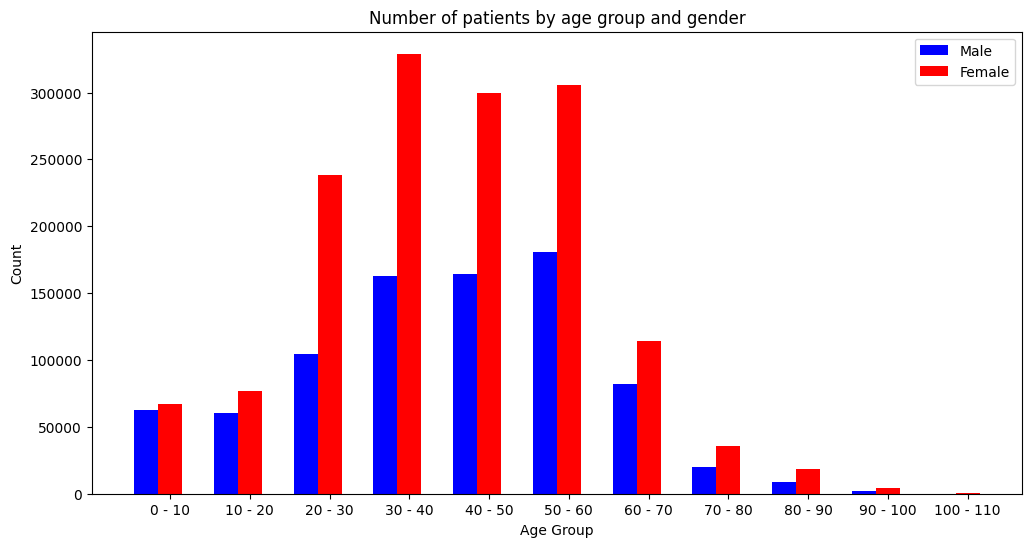

In [ ]:
# Criando as faixas etárias
bins = list(range(0, 115, 10))

# Filtrando apenas os valores "M" e "F" na coluna "Gender"
copy_Geral_Labs_Data = copy_Geral_Labs_Data[copy_Geral_Labs_Data['Gender'].isin(['M', 'F'])]

# Criando uma nova coluna com as faixas etárias
copy_Geral_Labs_Data['Age Group'] = pd.cut(copy_Geral_Labs_Data['Age'], bins=bins)

# Agrupando os dados por faixa etária e gênero
grouped = copy_Geral_Labs_Data.groupby(['Age Group', 'Gender']).size().reset_index(name='Count')

# Criando o gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.3

# Definindo a posição das barras no eixo x
x = [i + width/2 for i in range(len(bins) - 1)]

# Separando os dados por gênero
male_data = grouped[grouped['Gender'] == 'M']
female_data = grouped[grouped['Gender'] == 'F']

# Criando as barras
rects1 = ax.bar(x, male_data['Count'], width, color='b', label='Male')
rects2 = ax.bar([i + width for i in x], female_data['Count'], width, color='r', label='Female')

# Adicionando o nome das faixas etárias no eixo x
ax.set_xticks([i + width for i in x])
ax.set_xticklabels([f'{bins[i]} - {bins[i+1]}' for i in range(len(bins)-1)])

# Adicionando legendas e título
ax.legend()
ax.set_xlabel('Age Group')
ax.set_ylabel('Count')
ax.set_title('Number of patients by age group and gender')

plt.show()

Esse gráfico tem o valor absoluto da quantidade de exames feitos por cada gênero em faixas etárias diferentes. Ele é útil para entendermos o perfil dos pacientes que realizaram a maioria dos exames.

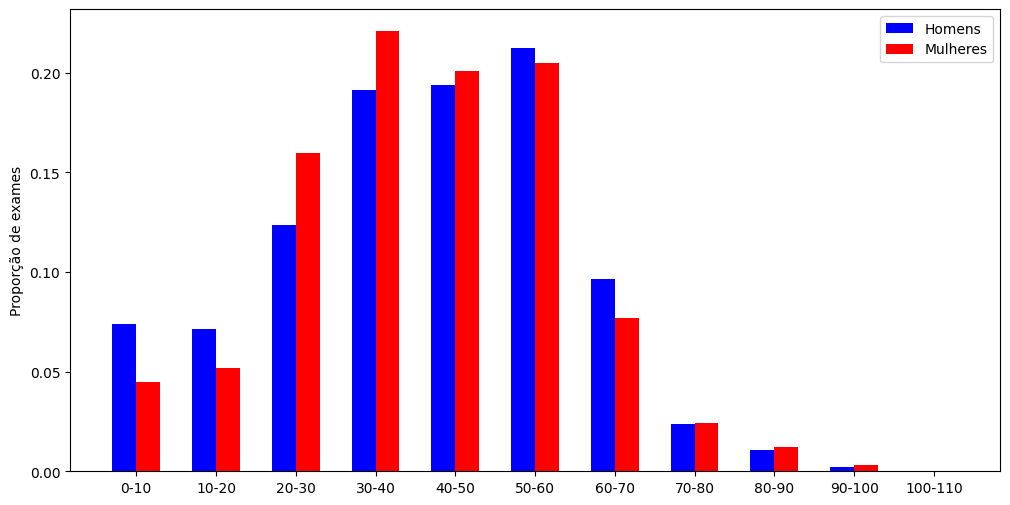

In [ ]:
# Filtra o dataframe para incluir apenas as linhas com valores "M" e "F" na coluna "Gender"
df = copy_Geral_Labs_Data[copy_Geral_Labs_Data['Gender'].isin(['M', 'F'])]

# Agrupa as idades em faixas etárias de 10 em 10 anos
bins = range(0, 115, 10)
df['faixa_etaria'] = pd.cut(df['Age'], bins=bins, labels=[f"{i}-{i+10}" for i in bins[:-1]])

# Calcula número total de exames feitos por homem e por mulher
num_homens = np.sum(copy_Geral_Labs_Data['Gender'] == 'M')
num_mulheres = np.sum(copy_Geral_Labs_Data['Gender'] == 'F')

# Calcula as proporções de exames realizados por homens e mulheres em cada faixa etária
prop_homem = df[df['Gender'] == 'M'].groupby('faixa_etaria').size() / num_homens
prop_mulher = df[df['Gender'] == 'F'].groupby('faixa_etaria').size() / num_mulheres

# Plotagem do gráfico de barras
fig, ax = plt.subplots(figsize=(12, 6))
bar_width = 0.3
r1 = range(len(prop_homem))
r2 = [x + bar_width for x in r1]
plt.bar(r1, prop_homem, color='blue', width=bar_width, label='Homens')
plt.bar(r2, prop_mulher, color='red', width=bar_width, label='Mulheres')
plt.xticks([r + bar_width / 2 for r in range(len(prop_homem))], prop_homem.index)
plt.ylabel('Proporção de exames')
plt.legend()
plt.show()

Já esse gráfico ele representa as porcentagens de cada faixa etária dentro de cada gênero. Usei ele para ter uma noção melhor de como as faixas etárias impactam os gêneros de formas diferentes.

## Entendendo o público que mais tende a se consultar (proporcionalmente)
Vamos levar em conta não o número absoluto mas sim o percentual (NPX / PTX) sendo: (NPX = Número de Pacientes na faixa etária X) / (PTX = População Total na faixa etária X.) Isso será útil para entender qual faixa etária influencia mais na decisão em se consultar e também evitar erros causados pela diferença entre o número de pessoas em cada faixa etária.

In [ ]:
# Filtrar os exames por faixa etária e contar o número de ocorrências em cada faixa
exames_0_4 = len(data[(data['Age'] >= 0) & (data['Age'] <= 4)])
exames_5_9 = len(data[(data['Age'] >= 5) & (data['Age'] <= 9)])
exames_10_14 = len(data[(data['Age'] >= 10) & (data['Age'] <= 14)])
exames_15_19 = len(data[(data['Age'] >= 15) & (data['Age'] <= 19)])
exames_20_24 = len(data[(data['Age'] >= 20) & (data['Age'] <= 24)])
exames_25_34 = len(data[(data['Age'] >= 25) & (data['Age'] <= 34)])
exames_35_44 = len(data[(data['Age'] >= 35) & (data['Age'] <= 44)])
exames_45_54 = len(data[(data['Age'] >= 45) & (data['Age'] <= 54)])
exames_55_59 = len(data[(data['Age'] >= 55) & (data['Age'] <= 59)])
exames_60_64 = len(data[(data['Age'] >= 60) & (data['Age'] <= 64)])
exames_65_74 = len(data[(data['Age'] >= 65) & (data['Age'] <= 74)])
exames_75_84 = len(data[(data['Age'] >= 75) & (data['Age'] <= 84)])
exames_85_plus = len(data[data['Age'] >= 85])

# Criar a lista com os valores
lista_exames_por_idade = [
    exames_0_4, exames_5_9, exames_10_14, exames_15_19, exames_20_24, exames_25_34,
    exames_35_44, exames_45_54, exames_55_59, exames_60_64, exames_65_74,
    exames_75_84, exames_85_plus
]

In [ ]:
lista_exames_por_idade

[63605,
 57461,
 49776,
 75354,
 130942,
 428258,
 482863,
 475612,
 246937,
 162845,
 104265,
 42354,
 20147]

In [ ]:
data5

,Unnamed: 0,Id,Geographic Area Name,TotalPopulation,SexRatio(males per 100 females),Population_Under5Years,Population_5to9Years,Population_10to14Years,Population_15to19Years,Population_20to24Years,Population_25to34Years,Population_35to44Years,Population_45to54Years,Population_55to59Years,Population_60to64Years,Population_65to74Years,Population_75to84Years,Population_85YearsAndOver,MedianAgeInYears
0,0.0,8600000US35004,ZCTA5 35004,12045,94.1,805,1075,898,477,578,2088,1628,1200,886,683,1017,534,176,35.5
1,1.0,8600000US35005,ZCTA5 35005,7344,86.1,504,453,511,499,214,788,795,968,612,561,798,485,156,44.0
2,2.0,8600000US35006,ZCTA5 35006,2883,108.2,96,153,303,129,156,183,367,430,296,260,280,201,29,47.2
3,3.0,8600000US35007,ZCTA5 35007,26332,95.0,1936,1992,1837,1762,1376,3119,3849,3907,1665,1323,2096,1106,364,37.7
4,4.0,8600000US35010,ZCTA5 35010,20613,90.5,1306,1465,944,1217,1128,2513,2106,2950,1512,1472,2421,1155,424,42.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33116,33116.0,8600000US00982,ZCTA5 00982,14346,81.0,431,952,795,769,854,1975,1446,1769,957,948,1201,1654,595,44.8
33117,33117.0,8600000US00983,ZCTA5 00983,33947,81.4,1833,1589,1841,2203,2957,4809,3712,4081,1930,1574,4003,2405,1010,40.8
33118,33118.0,8600000US00985,ZCTA5 00985,31682,82.4,1171,1427,1833,2304,2032,3491,3966,4073,1732,2047,4207,2498,901,43.6
33119,33119.0,8600000US00987,ZCTA5 00987,54241,87.3,2287,2904,3648,3722,3654,6546,7649,7668,3315,3093,5537,3116,1102,41.2


In [ ]:
# Criando lista com a distribuição da população por idade
lista_população_por_idade = data5.iloc[33120]
colunas_excluidas = ["Unnamed: 0", "Id", "Geographic Area Name", "TotalPopulation", "SexRatio(males per 100 females)", "MedianAgeInYears"]
lista_população_por_idade = lista_população_por_idade.drop(colunas_excluidas).tolist()

In [ ]:
lista_população_por_idade

[19910574,
 20332014,
 21126132,
 21427260,
 22243598,
 45440291,
 41389256,
 42507185,
 21870620,
 20315096,
 29904177,
 15184558,
 6347991]

In [ ]:
divisor = 140 # 140 é o resultado da divisão entre o número da população total pelo número de exames total
lista_população_parametrada = [numero / divisor for numero in lista_população_por_idade]

In [ ]:
lista_população_parametrada

[142218.38571428572,
 145228.67142857143,
 150900.94285714286,
 153051.85714285713,
 158882.84285714285,
 324573.5071428571,
 295637.54285714286,
 303622.75,
 156218.7142857143,
 145107.82857142857,
 213601.26428571428,
 108461.12857142858,
 45342.79285714286]

In [ ]:
influencia_faixa_etaria = []

for valor1, valor2 in zip(lista_exames_por_idade, lista_população_parametrada):
    influencia_faixa_etaria.append(round(valor1 / valor2, 2))

print(influencia_faixa_etaria)

[0.45, 0.4, 0.33, 0.49, 0.82, 1.32, 1.63, 1.57, 1.58, 1.12, 0.49, 0.39, 0.44]


## Definindo os labs que tem a melhor performance

### Dataframe com o lucro mensal médio de cada laboratório.
Nesse caso resolvi usar o lucro mensal médio em vez do absoluto, pois não sei a data em que cada laboratório abriu, então não teria como fazer uma avaliação a partir dos valores absolutos

In [ ]:
# criando coluna de mês e ano
Geral_Labs_Data['Month-Year'] = pd.to_datetime(Geral_Labs_Data['Date of service']).dt.strftime('%m-%Y')

# criando novo dataframe com o total de lucro de cada laboratório em cada mês
profit_by_lab_month = Geral_Labs_Data.groupby(['Lab Id', 'Month-Year'])['Exam Profit'].sum().reset_index()

# criando novo dataframe com o lucro mensal médio de cada laboratório
avg_profit_by_lab = profit_by_lab_month.groupby('Lab Id')['Exam Profit'].mean().reset_index()

# renomeando coluna
avg_profit_by_lab.rename(columns={'Exam Profit': 'Avg Profit per Month'}, inplace=True)

# formatando os valores pra terem 2 casas decimais
avg_profit_by_lab['Avg Profit per Month'] = avg_profit_by_lab['Avg Profit per Month'].round(2)

# ordenando os valores do maior pro menor
avg_profit_by_lab = avg_profit_by_lab.sort_values(by='Avg Profit per Month', ascending=False)

# exibindo novo dataframe
print(avg_profit_by_lab)

    Lab Id  Avg Profit per Month
27    L133             237190.32
31    L139             198836.49
18    L121             161904.44
20    L123             159703.12
40    L152             142879.99
54    L166             142689.33
43    L155             133800.04
44    L156             124740.57
96    L662              85760.62
2     L061              82169.68
45    L157              75082.00
39    L150              72036.04
97    L664              66997.53
33    L141              64588.08
23    L126              51965.58
46    L158              49596.41
25    L131              47521.46
26    L132              43830.77
17    L120              42477.88
37    L148              41384.58
42    L154              38943.57
47    L159              37364.83
55    L167              35822.92
22    L125              34836.80
52    L164              34224.14
73    L525              33905.36
0     L058              32331.10
48    L160              31763.75
61    L173              28926.02
57    L169

### Dataframe com o número médio de exames mensais de cada laboratório
Aqui também optei pelo valor mensal médio ao invés do absoluto, pelo mesmo motivo

In [ ]:
# cria coluna com mês e ano
Geral_Labs_Data["Month_Year"] = pd.to_datetime(Geral_Labs_Data["Date of service"]).dt.to_period("M")

# agrupa por laboratório e mês/ano e conta o número de exames
exams_per_month = Geral_Labs_Data.groupby(["Lab Id", "Month_Year"])["Lab Id"].count().reset_index(name="Exams")

# agrupa por laboratório e calcula a média mensal de exames
exams_per_month_avg = exams_per_month.groupby("Lab Id")["Exams"].mean().reset_index(name="Exams per month")

# ordena por número médio de exames mensal de cada laboratório (do maior para o menor)
exams_per_month_avg = exams_per_month_avg.sort_values("Exams per month", ascending=False)

# formata a coluna "Exams per month" para exibir até duas casas decimais
exams_per_month_avg["Exams per month"] = exams_per_month_avg["Exams per month"].round(2)

# exibindo novo dataframe
print(exams_per_month_avg)

    Lab Id  Exams per month
27    L133          4686.92
40    L152          3661.73
31    L139          3593.08
18    L121          3397.92
54    L166          2929.15
96    L662          2821.31
44    L156          2677.38
20    L123          2633.42
43    L155          2264.23
33    L141          1946.96
26    L132          1928.23
23    L126          1891.54
97    L664          1860.19
46    L158          1794.62
2     L061          1770.65
0     L058          1480.04
39    L150          1479.50
25    L131          1386.08
45    L157          1360.85
73    L525          1340.69
47    L159          1339.38
48    L160          1305.31
52    L164          1293.12
37    L148          1291.08
22    L125          1204.63
55    L167          1191.96
42    L154          1188.08
56    L168          1074.92
32    L140           912.54
57    L169           898.50
30    L138           881.50
68    L520           787.69
60    L172           779.19
70    L522           773.04
17    L120          

### Conclusão dos laboratórios que mais performaram
Para definir isso eu usei os critérios dos datframes anteriores (lucro mensal médio e número médio de exames por mês)

In [ ]:
# Unindo os dataframes
ranking_labs = pd.merge(avg_profit_by_lab, exams_per_month_avg, on="Lab Id")

# Normalizando as colunas de "Avg Profit per Month" e "Exams per month"
scaler = MinMaxScaler()
ranking_labs[["Avg Profit per Month", "Exams per month"]] = scaler.fit_transform(ranking_labs[["Avg Profit per Month", "Exams per month"]])

# Calculando a nova métrica
ranking_labs["Score"] = ranking_labs["Avg Profit per Month"] * 0.5 + ranking_labs["Exams per month"] * 0.5
ranking_labs["Score"] = ranking_labs["Score"].apply(lambda x: round(x * 10, 2))

# Ordenando o dataframe pelo Score
ranking_labs = ranking_labs.sort_values(by="Score", ascending=False)

# Exibindo o dataframe final
print(ranking_labs)

    Lab Id  Avg Profit per Month  Exams per month  Score
0     L133              1.000000         1.000000  10.00
1     L139              0.838204         0.766358   8.02
2     L121              0.682406         0.724672   7.04
4     L152              0.602151         0.781021   6.92
3     L123              0.673119         0.561376   6.17
5     L166              0.601346         0.624544   6.13
7     L156              0.525629         0.570766   5.48
6     L155              0.563847         0.482518   5.23
8     L662              0.361192         0.601509   4.81
9     L061              0.346044         0.377090   3.62
13    L141              0.271875         0.414750   3.43
12    L664              0.282040         0.396216   3.39
14    L126              0.218627         0.402912   3.11
11    L150              0.303295         0.314901   3.09
10    L157              0.316144         0.289558   3.03
17    L132              0.184310         0.410749   2.98
15    L158              0.20863

## Mapa com a localização de cada laboratório que a rede tem atualmente

Aqui eu plotei um mapa com marcações nos lugares que estão instalados cada laboratório e classifiquei eles em categorias baseadas no ranking que fiz acima, deixando assim o top 10 em verde, de 11 - 40 em azul, 41 - 70 em laranja e de 71 em diante ficou marcado com vermelho.

In [ ]:
# Separando a coluna Location em Latitude e Longitude
data3[['Latitude','Longitude']] = data3['Location'].str.split(',', expand=True)
data3['Latitude'] = data3['Latitude'].astype(float)
data3['Longitude'] = data3['Longitude'].astype(float)

# renomeando colunas
data3 = data3.rename(columns={"Lab Id ": "Lab Id"})

# mesclando o dataframe com as coordenadas
ranking_labs = pd.merge(ranking_labs, data3[["Lab Id", "Latitude", "Longitude"]], how="left", on="Lab Id")

# criando a cor para cada laboratório com base no seu ranking
color_dict = {}
for lab_id, row in ranking_labs.iterrows():
    if lab_id <= 10:
        color_dict[row["Lab Id"]] = "green"
    elif lab_id > 10 and lab_id <= 40:
        color_dict[row["Lab Id"]] = "blue"
    elif lab_id > 40 and lab_id <= 70:
        color_dict[row["Lab Id"]] = "orange"
    else:
        color_dict[row["Lab Id"]] = "red"

In [ ]:
from sklearn.cluster import DBSCAN

# Criando o DataFrame para o DBSCAN
coordenadas = ranking_labs[['Latitude', 'Longitude']].values

# Definindo os parâmetros do DBSCAN
epsilon = 0.3  # Distância máxima entre dois pontos para considerá-los vizinhos
min_samples = 5  # Número mínimo de pontos para formar um cluster

# Executando o DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=min_samples)
clusters = dbscan.fit_predict(coordenadas)

# Adicionando os clusters ao DataFrame dos laboratórios
ranking_labs['cluster'] = clusters

# Criando o mapa
m = folium.Map(location=[37, -95], zoom_start=4)

# Iterando sobre os clusters e adicionando marcadores ao mapa
for cluster_id in ranking_labs['cluster'].unique():
    # Filtrando os laboratórios pertencentes ao cluster atual
    laboratorios_cluster = ranking_labs[ranking_labs['cluster'] == cluster_id]

    # Criando um grupo de marcadores para o cluster atual
    cluster_group = folium.FeatureGroup(name=f"Cluster {cluster_id}")

    # Adicionando marcadores ao grupo do cluster
    for _, laboratorio in laboratorios_cluster.iterrows():
        color = color_dict.get(laboratorio["Lab Id"], "black")
        folium.Marker([laboratorio['Latitude'], laboratorio['Longitude']],
                      icon=folium.Icon(color=color),
                      popup=laboratorio['Lab Id']).add_to(cluster_group)

    # Adicionando o grupo de marcadores ao mapa
    cluster_group.add_to(m)

# Adicionando controle de camadas ao mapa
folium.LayerControl().add_to(m)

# Exibindo o mapa
m

Plotei esse mapa para conseguir entender melhor como os laboratórios já estão espalhados pelos Estados Unidos. A partir disso percebi que eles se concentram em volta de 7 clusters distintos (quando excluimos os ruídos).

## Escolha dos 3 Clusters

In [ ]:
# Calculando a média de notas por número de laboratórios para cada cluster
cluster_stats = ranking_labs.groupby('cluster').agg({'Score': ['sum', 'count']})
cluster_stats.columns = ['Sum_Score', 'Lab_Count']
cluster_stats['Average_Score'] = cluster_stats['Sum_Score'] / cluster_stats['Lab_Count']

# Selecionando os três clusters com as melhores médias
top_clusters = cluster_stats.nlargest(3, 'Average_Score')

# Obtendo os rótulos dos três clusters selecionados
top_cluster_labels = top_clusters.index.tolist()

# Filtrando o DataFrame "ranking_labs" para incluir apenas os laboratórios dos três clusters selecionados
top_clusters_labs = ranking_labs[ranking_labs['cluster'].isin(top_cluster_labels)]

# Imprimindo os resultados
for cluster_id, average_score in top_clusters['Average_Score'].items():
    labs_count = cluster_stats.loc[cluster_id, 'Lab_Count']
    print(f"Cluster {cluster_id}: Média de Notas = {average_score:.2f}, Número de Laboratórios = {labs_count}")

Cluster 0: Média de Notas = 2.13, Número de Laboratórios = 14
Cluster 3: Média de Notas = 1.74, Número de Laboratórios = 20
Cluster 1: Média de Notas = 1.71, Número de Laboratórios = 19


Aqui selecionei as 3 áreas que obtiveram os melhores resultados a fim de restringir o meu campo de análise para elas, visto que as áreas desses clusters já foram validadas.

In [ ]:
# Manter apenas a primeira linha de cada laboratório
Geral_Labs_Data.drop_duplicates(subset='Lab Id', keep='first', inplace=True)

# Reiniciar os índices do DataFrame resultante
Geral_Labs_Data.reset_index(drop=True, inplace=True)

In [ ]:
ranking_labs = pd.merge(ranking_labs, Geral_Labs_Data[['Lab Id', 'Zipcode']], on='Lab Id', how='left')

### Formatando os Zipcodes

In [ ]:
# Ajuste as configurações de exibição para mostrar todas as linhas e colunas
pd.set_option('display.max_rows', 120)
pd.set_option('display.max_columns', 120)

In [ ]:
# Converter a coluna 'Zipcode' para string
ranking_labs['Zipcode'] = ranking_labs['Zipcode'].astype(str)

# Remover o ".0" do final dos números
ranking_labs['Zipcode'] = ranking_labs['Zipcode'].str[:-2]

# Adicionar zero à esquerda para Zip codes com 4 dígitos
ranking_labs['Zipcode'] = ranking_labs['Zipcode'].apply(lambda x: x.zfill(5))

In [ ]:
# Selecionando apenas os Laboratórios que estão nos clusters 0, 3 e 1
Labs_Top_Clusters = ranking_labs[ranking_labs['cluster'].isin([0, 3, 1])].copy()
# Reiniciar os índices do DataFrame resultante
Labs_Top_Clusters.reset_index(drop=True, inplace=True)

## Analisando os Zipcodes selecionados

In [ ]:
# Renomeando a coluna dos zip codes
ZCTA_Data.rename(columns={'Geographic Area Name' : 'Zipcode'}, inplace=True)

# Extrair os 5 dígitos dos códigos de zipcode
ZCTA_Data['Zipcode'] = ZCTA_Data['Zipcode'].str.extract(r'(\d{5})')

# Mesclar os dataframes com base na coluna "Zipcode"
Info_Top_Zipcodes = pd.merge(Labs_Top_Clusters, ZCTA_Data, on='Zipcode', how='left')

# Criando nova coluna que contém a Influência das Faixas Etárias que deve ser levada em consideração nas escolhas dos Zip codes
Info_Top_Zipcodes['Influencia_FE'] = Info_Top_Zipcodes['Population_Under5Years'] * influencia_faixa_etaria[0] + Info_Top_Zipcodes['Population_5to9Years'] * influencia_faixa_etaria[1] + Info_Top_Zipcodes['Population_10to14Years'] * influencia_faixa_etaria[2] + Info_Top_Zipcodes['Population_15to19Years'] * influencia_faixa_etaria[3] + Info_Top_Zipcodes['Population_20to24Years'] * influencia_faixa_etaria[4] + Info_Top_Zipcodes['Population_25to34Years'] * influencia_faixa_etaria[5] + Info_Top_Zipcodes['Population_35to44Years'] * influencia_faixa_etaria[6] + Info_Top_Zipcodes['Population_45to54Years'] * influencia_faixa_etaria[7] + Info_Top_Zipcodes['Population_55to59Years'] * influencia_faixa_etaria[8] + Info_Top_Zipcodes['Population_60to64Years'] * influencia_faixa_etaria[9] + Info_Top_Zipcodes['Population_65to74Years'] * influencia_faixa_etaria[10] + Info_Top_Zipcodes['Population_75to84Years'] * influencia_faixa_etaria[11] + Info_Top_Zipcodes['Population_85YearsAndOver'] * influencia_faixa_etaria[12]

In [ ]:
# Para essa análise eu normalizei as colunas da proporção de homens e mulheres e a coluna da influência das faixas etárias e usei elas duas para formar o ranking dos Zip codes.

# Normalizando as colunas
max_sex_ratio = Info_Top_Zipcodes['SexRatio(males per 100 females)'].max()
max_influencia = Info_Top_Zipcodes['Influencia_FE'].max()

Info_Top_Zipcodes['SexRatio_normalized'] = 1 - (Info_Top_Zipcodes['SexRatio(males per 100 females)'] / max_sex_ratio)
Info_Top_Zipcodes['Influencia_normalized'] = Info_Top_Zipcodes['Influencia_FE'] / max_influencia

# Calculando a coluna Score_Geral
Info_Top_Zipcodes['Score_Geral'] = 0.4 * Info_Top_Zipcodes['SexRatio_normalized'] + 0.6 * Info_Top_Zipcodes['Influencia_normalized']

# Criando o DataFrame Ranking_Zipcodes
Ranking_Zipcodes = Info_Top_Zipcodes[['Zipcode', 'Score_Geral', 'SexRatio(males per 100 females)', 'Influencia_FE', 'SexRatio_normalized', 'Influencia_normalized']].copy()

# Ordenando o DataFrame do maior para o menor com base na coluna Score_Geral
Ranking_Zipcodes = Ranking_Zipcodes.sort_values(by='Score_Geral', ascending=False)

# Resetando os índices do DataFrame
Ranking_Zipcodes = Ranking_Zipcodes.reset_index(drop=True)

In [ ]:
Ranking_Zipcodes

,Zipcode,Score_Geral,SexRatio(males per 100 females),Influencia_FE,SexRatio_normalized,Influencia_normalized
0,94565,0.748907,100.5,99951.21,0.372267,1.000000
1,19120,0.614534,90.6,73446.23,0.434104,0.734821
2,98052,0.594903,103.6,75586.68,0.352904,0.756236
3,19124,0.585304,90.5,68535.35,0.434728,0.685688
4,19143,0.584218,80.5,64192.38,0.497189,0.642237
5,98012,0.571482,100.2,70269.90,0.374141,0.703042
6,94513,0.542127,94.5,63007.56,0.409744,0.630383
7,19148,0.485184,98.3,55103.18,0.386009,0.551301
8,19148,0.485184,98.3,55103.18,0.386009,0.551301
9,19140,0.484745,88.7,51034.48,0.445971,0.510594


# Conclusão

Com essa análise detalhada na qual fiz o tratamento dos dados e a análise exploratória, cheguei a conclusão de que os **3 melhores Zip codes para a abertura de novas unidades para essa rede de laboratórios em questão são os Zip codes de números: 94565, 19120 e 98052 (Como é mostrado no dataframe acima chamado "Ranking_Zipcodes")**. Cheguei nesses códigos após uma análise detalhada não só do público-alvo da rede de laboratórios mas também do ambiente, levando em consideração a distribuição dos laboratórios atuais da rede e optando por abrir novas unidades em áreas que já foram validadas anteriormente e que obtiveram um excelente resultado.